<a href="https://colab.research.google.com/github/devjaime/data_science_escalab/blob/main/Copia_de_2021_12_14_Clase_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 11
## Introducción a statsmodel y scikit-learn

# Analisis de regresión con XGB 'xtream gradient boosting' àrboles de decisión

## Evaluación de precios

Attribute Information:

* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)
* X5=the geographic coordinate, latitude. (unit: degree)
* X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

* Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Dataset: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/joseruiz1989/public_datasets/main/Real%20estate%20valuation%20data%20set.csv")

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.tail()

###  Choosing features :  Feature Selection

In [ ]:
data=data.drop(['X1 transaction date','No'],axis=1)

In [ ]:
data.columns

In [ ]:
data.columns = ['House Age','Distance to MRT','Number Stores','Latitude','Longitude','House Price Unit']

In [ ]:
data.head()

### Null variables and missing values

In [ ]:
data.isna().sum()

### Select output and input variables

In [ ]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

### Split train and test

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 1) # 75 - 25 split   (test_size=0.25)

In [ ]:
X_train.shape, X_test.shape

### Chossing Regressor

In [ ]:
model = XGBRegressor()

### Fitting model

In [ ]:
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(X_train, y_train)

In [ ]:
# model = XGBRegressor(n_estimators=1000, max_depth=6)
# model.fit(X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, ax=plt.gca())

In [ ]:
plt.scatter(data["House Age"], data["House Price Unit"])
plt.ylabel("House price unit")
plt.show()

In [ ]:
plt.scatter(data["Number Stores"], data["House Price Unit"])
plt.show()

### Predicting new values

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0:10]

In [ ]:
X_test.iloc[0]

In [ ]:
y_test.iloc[0]

## Model Error

#### Training MSE

In [ ]:
pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

In [ ]:
print( r2_score(y_train, pred_train) ) # how much variance the model explains?

In [ ]:
print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ?? 

#### Testing MSE

In [ ]:
predictions = model.predict(X_test)
model.score(X_test, y_test)  ## R^2

In [ ]:
print(r2_score(y_test, predictions))

In [ ]:
print(mean_squared_error(y_test, predictions))

### Qué hacer??

* Remover outliers de los precios por unidad
* Adicionemos la fecha como año y mes, día?
* Cambiar valores de train - test split size   (test_size=0.33)
* Optimizar hyperparámetros
* Validación cruzada

## SEGUNDA PARTE

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/joseruiz1989/public_datasets/main/Real%20estate%20valuation%20data%20set.csv")

In [ ]:
data.head()

In [ ]:
data=data.drop(['No'],axis=1)

In [ ]:
data.columns = ['Date','House Age','Distance to MRT','Number Stores','Latitude','Longitude','House Price Unit']
data

### FEATURE ENGINEERING

In [ ]:
type(data.Date[0])

In [ ]:
from datetime import datetime

data['date_time'] =  pd.to_datetime(data['Date'], format='%Y')

data['year'] = pd.DatetimeIndex(data['date_time']).year

data.head()

In [ ]:
import math
data['month'],data['year2'] =  data['Date'].apply(lambda x: math.modf(x)).str

In [ ]:
data.head()

In [ ]:
data['year2'] = ( data['year2']).astype(int)

In [ ]:
data['month'] = data['month']*12

In [ ]:
data.head()

In [ ]:
data['day'],data['month'] =  data['month'].apply(lambda x: math.modf(x)).str

In [ ]:
data.head()

In [ ]:
data['month'] = ( data['month']).astype(int)

data['day'] = ( data['day']*30 + 1).astype(int)

In [ ]:
data.head()

### Variable selection

In [ ]:
data = data.drop(['Date','date_time','year2'],axis=1)

In [ ]:
data.head()

### Outliers

In [ ]:
data['House Price Unit'].hist()

In [ ]:
data = data[ data['House Price Unit']<90 ]

In [ ]:
import matplotlib.pyplot as plt

data['House Price Unit'].hist()
plt.show()

#### Select variables

In [ ]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

#### Split train and test

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

In [ ]:
X_train.shape, X_test.shape

### Regression Model

In [ ]:
model = XGBRegressor()

In [ ]:
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(X_train, y_train)

In [ ]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

### Train performance

In [ ]:
pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE

print(r2_score(y_train, pred_train))

In [ ]:
print(mean_squared_error(y_train, pred_train)) 

### Test performance

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(r2_score(y_test, predictions))

In [ ]:
model.score(X_test, y_test)  # R^2

In [ ]:
print(mean_squared_error(y_test, predictions))

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("House price unit Real")
plt.ylabel("House price unit Predicted")
plt.show()

## TERCERA PARTE

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.corr()

In [ ]:
pd.crosstab(data['year'],  columns='count')

In [ ]:
data.groupby('year')['House Price Unit'].mean()

In [ ]:
data.groupby('month')['House Price Unit'].mean()

### Selección de variable con regresión lineal

#### Select variables

In [ ]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

In [ ]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()

lin_reg.summary()

In [ ]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

In [ ]:
plt.scatter(data.Longitude, data.Latitude)

### Selección de variables con 'Recursive Feature Elimination'

In [ ]:
# explicar cross validation


from sklearn.feature_selection import RFECV
model = XGBRegressor()
selector = RFECV (model, step=3, min_features_to_select=3, cv=4)     # cv → cross validation


selector.fit(X,y)

print(X.columns)
print(selector.ranking_)    # [1 2 1 2 3 1 3 1]

In [ ]:
print(selector.grid_scores_.mean())

In [ ]:
# drop variables
data = data.drop(['Longitude','day','year'], axis=1)

In [ ]:
data.shape

In [ ]:
X = data.drop('House Price Unit',axis=1)
y = data['House Price Unit']

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
# model = XGBRegressor(gpu_id=0)  ## gpu_id=-1 if not gpu
model = XGBRegressor()

In [ ]:
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(X_train, y_train)

### Model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
pred_train = model.predict(X_train)
print("R^2 train ", r2_score(y_train, pred_train))  # model.score
print("MSE train ", mean_squared_error(y_train, pred_train))  

In [ ]:
pred_test = model.predict(X_test)
print("R^2 test ", r2_score(y_test, pred_test))  # model.score
print("MSE test ", mean_squared_error(y_test, pred_test)) 

In [ ]:
xgb.plot_importance(model, ax=plt.gca())

In [ ]:
#Cross validation

from sklearn.model_selection import cross_val_score

scores_total = []
for i in range(50):
  scores = cross_val_score(model, X_train, y_train, cv=i+2).mean()
  scores_total.append(scores)

In [ ]:
for i in range(50):
  print(i+2, "-" , scores_total[i])

# Base de datos

https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records


- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)


¿Qué calculamos?

$$ Log Odds( y=1 )=  \beta_0+ \beta_{1}*x_{1} + \beta_{2}*x_{2} + \beta_{3}*x_{3} $$

Odds

$$ Odds( y=1 )= e^{ \beta_0+ \beta_{1}*x_{1} + \beta_{2}*_{2} + \beta_{3}*_{3} } =  e^{ \beta_0}  e^{\beta_{1}*x_{1}} e^{ \beta_{2}*x_{2}} e^{\beta_{3}*x_{3} }$$

sabemos

$$ Odds = {p \over {1 - p}} $$

Probabilidad de y dado x:

$$  P(y=1|X)  = {1\over {1 + e^{- (\beta_0 + \beta_{1}*x_{1} + \beta_{2}*x_{2}  + \beta_{3}*x_{3} )}}  }  $$
                       
En resumen, calculamos los LogOdds y luego la probabilidad que transformamos a 0 o 1 usando un umbral, típicamente 0.5.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

In [ ]:
heart_failure = pd.read_csv('https://raw.githubusercontent.com/joseruiz1989/public_datasets/main/heart_failure_clinical_records_dataset.csv')

In [ ]:
heart_failure.head(n=10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
cols =["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"];
heart_failure[cols].corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


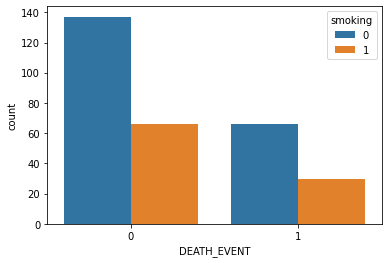

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="DEATH_EVENT", hue="smoking", data=heart_failure);

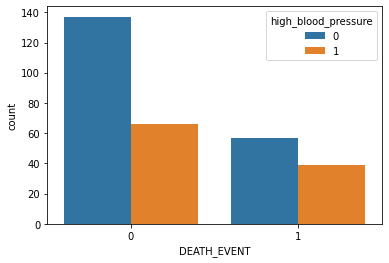

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="DEATH_EVENT", hue="high_blood_pressure", data=heart_failure);

In [ ]:
heart_failure.groupby(['DEATH_EVENT'])['age'].mean()

DEATH_EVENT
0    58.761906
1    65.215281
Name: age, dtype: float64

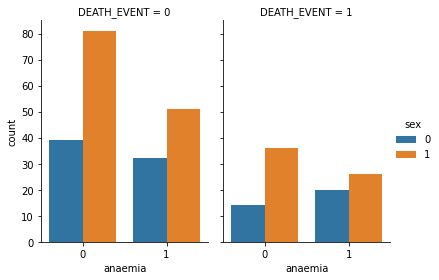

In [ ]:
sns.catplot(x="anaemia", hue="sex", col="DEATH_EVENT",
                data=heart_failure, kind="count",
                height=4, aspect=.7);

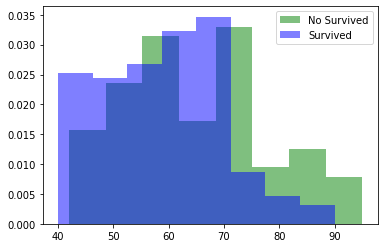

In [ ]:
x1 = heart_failure.age[heart_failure.DEATH_EVENT==1]
x2 = heart_failure[heart_failure.DEATH_EVENT==0]['age']

# Normalize
kwargs = dict(alpha=0.5, bins=8, density=True, stacked=True)  # 8 bins for 8 groups of age, 0 -10 , 11 - 20, ...

plt.hist(x1, **kwargs, color='g', label='No Survived');      # green
plt.hist(x2, **kwargs, color='b', label='Survived');   # blue
plt.legend();

## scikit-learn

### Separando los datos en "train" y "test"

In [ ]:
from sklearn.model_selection import train_test_split
X= heart_failure.drop(columns = "DEATH_EVENT")
y= heart_failure.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 0, test_size=0.30)

### Entrenando y corriendo el modelo

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)    ## predictions are binary classes (0 or 1)

accuracyTrain = model.score(X_train, y_train)
accuracyTest = model.score(X_test, y_test)

print("Precisión en el conjunto de entrenamiento: ", accuracyTrain)
print("Precisión en el conjunto de pruebas: ", accuracyTest)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=7).mean()

print("Precisión en validación cruzada: ", scores)

Precisión en el conjunto de entrenamiento:  0.84688995215311
Precisión en el conjunto de pruebas:  0.7888888888888889
Precisión en validación cruzada:  0.8471264367816091


In [ ]:
model.coef_

array([[ 6.46063266e-02,  3.95351572e-04,  3.12935359e-04,
         7.42913479e-04, -8.33875405e-02, -6.72730185e-04,
        -7.30335446e-07,  5.71073067e-03,  3.58125547e-03,
        -1.05658327e-03, -2.94136129e-04, -2.02158282e-02]])

## Usando StatsModels

In [ ]:
import statsmodels.api as sm

X_m = sm.add_constant(X_train)

# Salida de statsmodels
logit = sm.Logit(y_train, X_m)
results = logit.fit()   #.params

results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.351414
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                           12
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4429
Time:                        23:08:16   Log-Likelihood:                -73.445
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 2.679e-19
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4142      6.722      1.698      0.089      -1.760      24.588
age                          0.0663      0.021      3.143      0.002       0.025       0.108
anaemia                      0.0687      0.434      0.158      0.874      -0.781       0.918
creatinine_phosphokinase     0.0004      0.000      1.563      0.118      -0.000       0.001
diabetes                     0.2499      0.436      0.573      0.567      -0.605       1.105
ejection_fraction           -0.0883      0.022     -3.980      0.000      -0.132      -0.045
high_blood_pressure         -0.3556      0.454     -0.783      0.433      -1.245       0.534
platelets                -1.213e-06   2.23e-06     -0.543      0.587   -5.59e-06    3.17e-06
serum_creatinine             0.4064      0.265      1.535      0.125      -0.113       0.925
serum_sodium                -0.0792      0.047     -1.702      0.089      -0.170       0.012
sex                         -1.0197      0.508     -2.009      0.045      -2.015      -0.025
smoking                      0.2383      0.529      0.450      0.653      -0.799       1.276
time                        -0.0206      0.004     -5.554      0.000      -0.028      -0.013
============================================================================================
"""

In [ ]:
## sin incluir anaemia, platelets, smoking
cols = ["anaemia", "platelets","smoking"]

X_m = X_m.drop(columns =cols)

#cols = ["age","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","serum_creatinine","serum_sodium",
#       "sex","time"]

logit2 = sm.Logit(y_train, X_m)
results2 = logit2.fit()   #.params

results2.summary()

Optimization terminated successfully.
         Current function value: 0.352582
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                            9
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4411
Time:                        23:11:04   Log-Likelihood:                -73.690
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 7.583e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.2351      6.654      1.689      0.091      -1.806      24.276
age                          0.0661      0.021      3.163      0.002       0.025       0.107
creatinine_phosphokinase     0.0004      0.000      1.480      0.139      -0.000       0.001
diabetes                     0.2481      0.435      0.570      0.568      -0.604       1.101
ejection_fraction           -0.0890      0.022     -4.038      0.000      -0.132      -0.046
high_blood_pressure         -0.3742      0.452     -0.828      0.408      -1.260       0.512
serum_creatinine             0.3891      0.261      1.491      0.136      -0.122       0.901
serum_sodium                -0.0794      0.046     -1.725      0.085      -0.170       0.011
sex                         -0.9028      0.451     -2.001      0.045      -1.787      -0.019
time                        -0.0206      0.004     -5.606      0.000      -0.028      -0.013
============================================================================================
"""

In [ ]:
cols = ["diabetes", "high_blood_pressure"]

X_m = X_m.drop(columns = cols)

logit3 = sm.Logit(y_train, X_m)
results3 = logit3.fit()   #.params

results3.summary()

Optimization terminated successfully.
         Current function value: 0.355168
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4370
Time:                        23:13:01   Log-Likelihood:                -74.230
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 7.522e-22
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.2482      6.334      1.776      0.076      -1.166      23.662
age                          0.0641      0.020      3.138      0.002       0.024       0.104
creatinine_phosphokinase     0.0004      0.000      1.508      0.132      -0.000       0.001
ejection_fraction           -0.0877      0.022     -3.998      0.000      -0.131      -0.045
serum_creatinine             0.4273      0.255      1.675      0.094      -0.073       0.927
serum_sodium                -0.0802      0.045     -1.791      0.073      -0.168       0.008
sex                         -0.8620      0.440     -1.961      0.050      -1.724      -0.000
time                        -0.0200      0.004     -5.600      0.000      -0.027      -0.013
============================================================================================
"""

In [ ]:
cols = ["serum_sodium", "creatinine_phosphokinase"]

X_m = X_m.drop(columns =cols)

logit4 = sm.Logit(y_train, X_m)
results4 = logit4.fit()   #.params

results4.summary()

Optimization terminated successfully.
         Current function value: 0.370550
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4126
Time:                        23:14:11   Log-Likelihood:                -77.445
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 7.337e-22
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7060      1.289      0.548      0.584      -1.821       3.233
age                   0.0567      0.019      2.985      0.003       0.019       0.094
ejection_fraction    -0.0855      0.021     -4.083      0.000      -0.126      -0.044
serum_creatinine      0.4960      0.248      2.000      0.045       0.010       0.982
sex                  -0.6705      0.422     -1.588      0.112      -1.498       0.157
time                 -0.0196      0.003     -5.659      0.000      -0.026      -0.013
=====================================================================================
"""

In [ ]:
cols = ["sex"]

X_m = X_m.drop(columns =cols)

logit5 = sm.Logit(y_train, X_m)
results5 = logit5.fit()   #.params

results5.summary()

Optimization terminated successfully.
         Current function value: 0.376670
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            4
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.4029
Time:                        23:15:10   Log-Likelihood:                -78.724
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 4.600e-22
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4485      1.260      0.356      0.722      -2.020       2.917
age                   0.0525      0.019      2.836      0.005       0.016       0.089
ejection_fraction    -0.0821      0.021     -4.002      0.000      -0.122      -0.042
serum_creatinine      0.4871      0.253      1.928      0.054      -0.008       0.982
time                 -0.0197      0.003     -5.701      0.000      -0.026      -0.013
=====================================================================================
"""

¿Qué calculamos?

$$ Log Odds( y=1 )=  \beta_0+ \beta_{ejection}*x_{ejection} + \beta_{serum}*x_{serum} + \beta_{time}*x_{time} $$

Odds

$$ Odds( y=1 )= e^{ \beta_0+ \beta_{ejection}*x_{ejection} + \beta_{serum}*_{serum} + \beta_{time}*_{time} } = e^{ \beta_0}  e^{\beta_{ejection}*x_{ejection}} e^{ \beta_{serum}*x_{serum}} e^{\beta_{time}*x_{time} }$$

sabemos

$$ Odds = {p \over {1 - p}} $$

Probabilidad de y dado x:

$$  P(y=1|X)  = {1\over {1 + e^{- (\beta_0 + \beta_{ejection}*x_{ejection} + \beta_{serum}*x_{serum} + \beta_{time}*x_{time} )}}  }  $$
                       
En resumen, calculamos los LogOdds y luego la probabilidad que transformamos a 0 o 1 usando un umbral, típicamente 0.5.


### Rendimiento del modelo

In [ ]:
colu = ['age', 'ejection_fraction', 'serum_creatinine', 'time'] # columnas que necesitamos

X_test_m = sm.add_constant(X_test[colu])  ## necesario

pred_train = results5.predict(X_m)    ## los resultados son probabilidades

pred_train =  pred_train.apply(lambda x: 1 if x >0.5 else 0)

pred_test = results5.predict(X_test_m)

pred_test =  pred_test.apply(lambda x: 1 if x >0.5 else 0)

##  score function not available in statsmodels

from sklearn.metrics import accuracy_score

accuracyTrain = accuracy_score(y_train, pred_train )
accuracyTest = accuracy_score(y_test, pred_test)

print("Precisión en el conjunto de entrenamiento: ", accuracyTrain)

print("Precisión en el conjunto de pruebas: ", accuracyTest)

Precisión en el conjunto de entrenamiento:  0.8373205741626795
Precisión en el conjunto de pruebas:  0.8222222222222222


### Pregunta: ¿Diferente al modelo usado con sklearn.linear_model ??

In [ ]:
model.fit(X_train[colu], y_train).score(X_test[colu], y_test)

0.8222222222222222

## ¿Otra forma de ejecutar el modelo logístico?

In [ ]:
X_m.columns

Index(['const', 'age', 'ejection_fraction', 'serum_creatinine', 'time'], dtype='object')

In [ ]:
logit_glm = sm.GLM(y_train, X_m, family=sm.families.Binomial()).fit()   # modelo de regresión logístico
logit_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                            GLM   Df Residuals:                      204
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78.724
Date:                Thu, 16 Dec 2021   Deviance:                       157.45
Time:                        23:22:31   Pearson chi2:                     212.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4485      1.260      0.356      0.722      -2.020       2.917
age                   0.0525      0.019      2.836      0.005       0.016       0.089
ejection_fraction    -0.0821      0.021     -4.002      0.000      -0.122      -0.042
serum_creatinine      0.4871      0.253      1.928      0.054      -0.008       0.982
time                 -0.0197      0.003     -5.701      0.000      -0.026      -0.013
=====================================================================================
"""

# Sobrevivientes del TITANIC - Analísis
https://www.kaggle.com/c/titanic/data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier # árbol de decisión
import xgboost as xgb

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/joseruiz1989/public_datasets/main/titanic_train.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Elección de características: Selección de características

In [ ]:
data= data[['Pclass','Sex','Age','Survived','Parch','SibSp']]

In [ ]:
data.head()

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0


###  Encoding variables

In [ ]:
data['Sex'] = data['Sex'].map( {'male':0,'female':1} )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head(10)

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,0,22.0,0,0,1
1,1,1,38.0,1,0,1
2,3,1,26.0,1,0,0
3,1,1,35.0,1,0,1
4,3,0,35.0,0,0,0
5,3,0,NaN,0,0,0
6,1,0,54.0,0,0,0
7,3,0,2.0,0,1,3
8,3,1,27.0,1,2,0
9,2,1,14.0,1,0,1


### Null variables and missing values

In [ ]:
data = data.dropna()

### Select output and input variables

In [ ]:
X = data.drop('Survived',axis=1)
y = data['Survived']

### Split train and test

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

### Chossing Classifier

In [ ]:
model = XGBClassifier()

### Fitting model

In [ ]:
model.fit(X_train, y_train)

XGBClassifier()

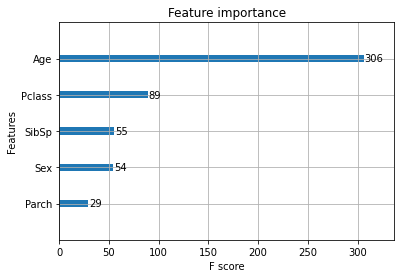

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, ax=plt.gca())

### Predicting new values

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(len(predictions))
print(predictions[:10])

179
[1 0 1 1 0 0 1 0 0 0]


In [ ]:
print(X_test)
print("-------------------------")
X_test.loc[689]

     Pclass  Sex   Age  Parch  SibSp
689       1    1  15.0      1      0
278       3    0   7.0      1      4
506       2    1  33.0      2      0
9         2    1  14.0      0      1
494       3    0  21.0      0      0
..      ...  ...   ...    ...    ...
322       2    1  30.0      0      0
597       3    0  49.0      0      0
436       3    1  21.0      2      2
257       1    1  30.0      0      0
452       1    0  30.0      0      0

[179 rows x 5 columns]
-------------------------


Pclass     1.0
Sex        1.0
Age       15.0
Parch      1.0
SibSp      0.0
Name: 689, dtype: float64

In [ ]:
data.loc[(data['Pclass'] == 1) & \
         (data['Sex'] == 1) & \
         (data['Age'] == 15) & \
         (data['Parch'] == 1) & \
         (data['SibSp'] == 0)]

,Pclass,Sex,Age,Survived,Parch,SibSp
689,1,1,15.0,1,1,0


In [ ]:
predictions = model.predict(X_test)

In [ ]:
X_new = X_test.iloc[0:2]
X_new


# new_val = {'Pclass':  1,
#            'Sex':  1,
#            'Age':  15,
#            'Parch':  1,
#            'SibSp':  0}



,Pclass,Sex,Age,Parch,SibSp
689,1,1,15.0,1,0
278,3,0,7.0,1,4


In [ ]:
X_new["Pclass"].iloc[0] = 3
X_new

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,Parch,SibSp
689,3,1,15.0,1,0
278,3,0,7.0,1,4


In [ ]:
X_new = X_test.iloc[0:2]

X_new["Pclass"].iloc[0] = 3
X_new["Sex"].iloc[0] = 0
X_new["Age"].iloc[0] = 15
X_new["Parch"].iloc[0] = 1
X_new["SibSp"].iloc[0] = 0

predictions = model.predict(X_new)
if predictions[0] == 1:
  print("pred: sobrevive", predictions[0])
else:
  print("pred: muere", predictions[0])

pred: muere 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

## Accuracy

#### Training accuracy

In [ ]:
model.score(X_train, y_train) ## accuracy

0.8598130841121495

In [ ]:
pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train,pred_train)

array([[285,  27],
       [ 48, 175]])

#### Testing accuracy

In [ ]:
model.score(X_test, y_test)

0.8379888268156425

In [ ]:
confusion_matrix(y_test,predictions)

array([[99, 13],
       [16, 51]])